# Asignación 4. Incremental linear regression

## Método Iterativo Mínimos Cuadrados (LMS)

* Se Buscaran los valores para W que minimice el valor cuadrativo 
    (y-V ^ (X)) 2

In [1]:
#Importamos las Librerias requeridas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import random


In [2]:
# Generamos los vectores para las constantes 
weight_vector = np.zeros(3)
#w = np.array([0.1, 0.1, 0.1]) #25 weights

error_grp = []
iter_grp = []


In [3]:
#LIstamos los datos y verificamos que tengamos la fuente "regLinPoli.csv"
!pwd && ls MaterialyTareas/datos/ -l


/home/itam/machineLearning
total 1272
-rw-r--r-- 1 itam users 754845 Sep 14 16:11 EjercicioROC.csv
-rw-r--r-- 1 itam users     50 Sep  7 17:18 andSVM.csv
-rw-r--r-- 1 itam users  24483 Sep  7 17:18 regLin.csv
-rw-r--r-- 1 itam users 374795 Sep  7 17:18 regLin.xlsx
-rw-r--r-- 1 itam users  24467 Sep  7 17:18 regLin2.csv
-rw-r--r-- 1 itam users  24961 Sep  7 17:18 regLin3.csv
-rw-r--r-- 1 itam users  14299 Sep  7 17:18 regLin4.csv
-rw-r--r-- 1 itam users  66015 Sep  7 17:18 regLinPoli.csv


In [4]:
#Leemos el archivo y presentamos el contenido de las variables.
df_LR = pd.read_csv("MaterialyTareas/datos/regLinPoli.csv")
df_LR.head()

,X,X2,X3,X4,X5,y
0,7.317938,53.552216,0.864389,0.859736,114,50.552216
1,1.284357,1.649574,0.108686,0.959256,115,2.649574
2,97.740652,9553.235089,1.990075,-0.344100,116,9643.235089
3,17.753591,315.190006,1.249286,-0.889370,117,310.190006
4,66.441081,4414.417290,1.822437,-0.450777,118,4390.417290


In [5]:
# Hacemos e Split de los datos en training/testing datasets
df_LR_X_train, df_LR_X_test, df_LR_Y_train, df_LR_Y_test = train_test_split(df_LR[['X']], df_LR[['y']], test_size=0.33, random_state=42)


In [6]:
#Preparamos los datos en un arreglo 
training_LSM = np.array(df_LR_X_train).transpose()


In [7]:
len(df_LR_X_train)

689

### La función lms() recive el dataset correspondiente a la variable que estamos utilizando

In [8]:
def lms(w): 
  i = 0
  alpha = [0.1, 0.01, 0.001]
  Emax = 10000000000000000000000000
  maxIter = 500
  E = 0
  while ((i < maxIter) and (E < Emax)):
    E = 0
    for pair in training_LSM:
      y = np.dot(w.transpose(), pair[0])
      #print('y: ')
      #print(y)
      #print('==================')
      w = w + np.dot((alpha[2]*(pair[1] - y)), pair[0]) #aquí va la lamda
      #print('weight: ' + str(w))
      E = E + np.power((pair[1] - y), 2)
      #print('Error: ' + str(E))
    error_grp.append(E)
    iter_grp.append(i)
    i = i + 1
  #print('i: ' + str(i))

  print('Final error: ' + str(E))
  print('final weight: ' + str(w))




  

### Ejecutamos la funcion lms() para cada W, donde, iteramos para cada valor de nuestra variable en oservación 

In [9]:
w = []
for x in range(25):
  for y in range(1):
    val = round(random.random(), 1)
    print(val)
    w.append(val)
  weight_vector = np.array(w)
  print('Weight vector: ' + str(weight_vector))
  lms(weight_vector)
  w = []


0.7
Weight vector: [ 0.7]
Final error: [  7.27014210e-27]
final weight: [ 0.94418653]
0.9
Weight vector: [ 0.9]
Final error: [  7.27014210e-27]
final weight: [ 0.94418653]
0.8
Weight vector: [ 0.8]
Final error: [  7.27014210e-27]
final weight: [ 0.94418653]
0.0
Weight vector: [ 0.]
Final error: [  7.27014210e-27]
final weight: [ 0.94418653]
0.5
Weight vector: [ 0.5]
Final error: [  7.27014210e-27]
final weight: [ 0.94418653]
0.7
Weight vector: [ 0.7]
Final error: [  7.27014210e-27]
final weight: [ 0.94418653]
0.6
Weight vector: [ 0.6]
Final error: [  7.27014210e-27]
final weight: [ 0.94418653]
0.0
Weight vector: [ 0.]
Final error: [  7.27014210e-27]
final weight: [ 0.94418653]
0.5
Weight vector: [ 0.5]
Final error: [  7.27014210e-27]
final weight: [ 0.94418653]
0.6
Weight vector: [ 0.6]
Final error: [  7.27014210e-27]
final weight: [ 0.94418653]
0.6
Weight vector: [ 0.6]
Final error: [  7.27014210e-27]
final weight: [ 0.94418653]
0.3
Weight vector: [ 0.3]
Final error: [  7.27014210e-27

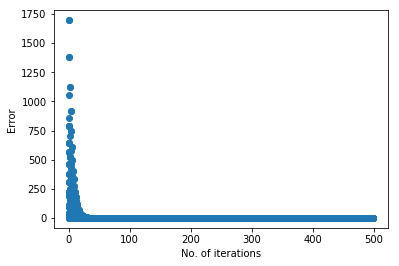

In [10]:
#Dibujamos el error por cada W
plt.scatter(iter_grp, error_grp)
plt.ylabel('Error')
plt.xlabel('No. of iterations')
plt.show()